# Data Analysis of POS transactions

## 1. Import necessary libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the CSV data into Pandas DataFrames:

In [24]:
pos1_data = pd.read_csv('../data/POS/checkout_1.csv')
pos2_data = pd.read_csv('../data/POS/checkout_2.csv')

## 3. Analyzing Anomalies

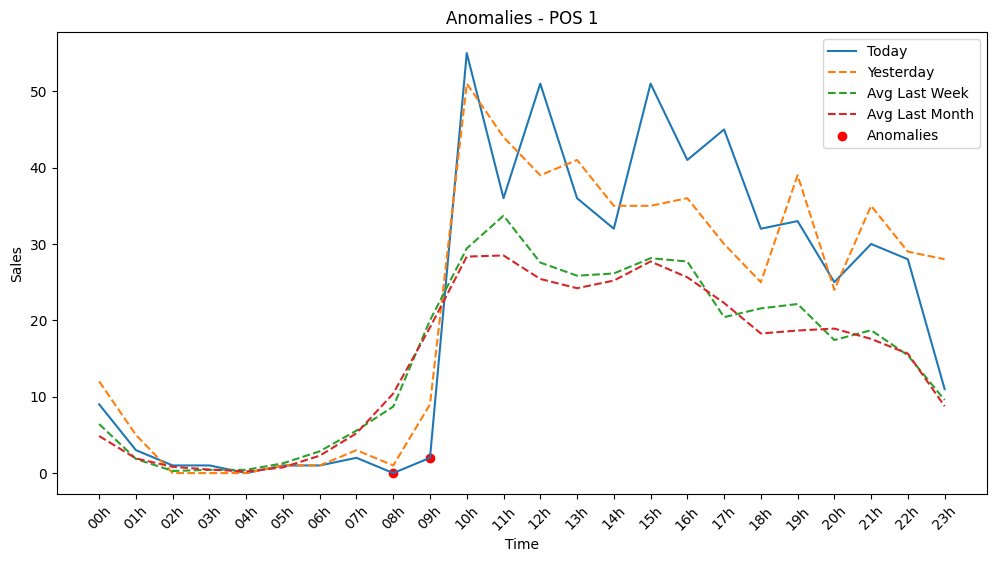

Anomalies - POS 1:
  time  today  yesterday  avg_last_week  avg_last_month
8  08h      0          1           8.71           10.42
9  09h      2          9          20.00           19.07


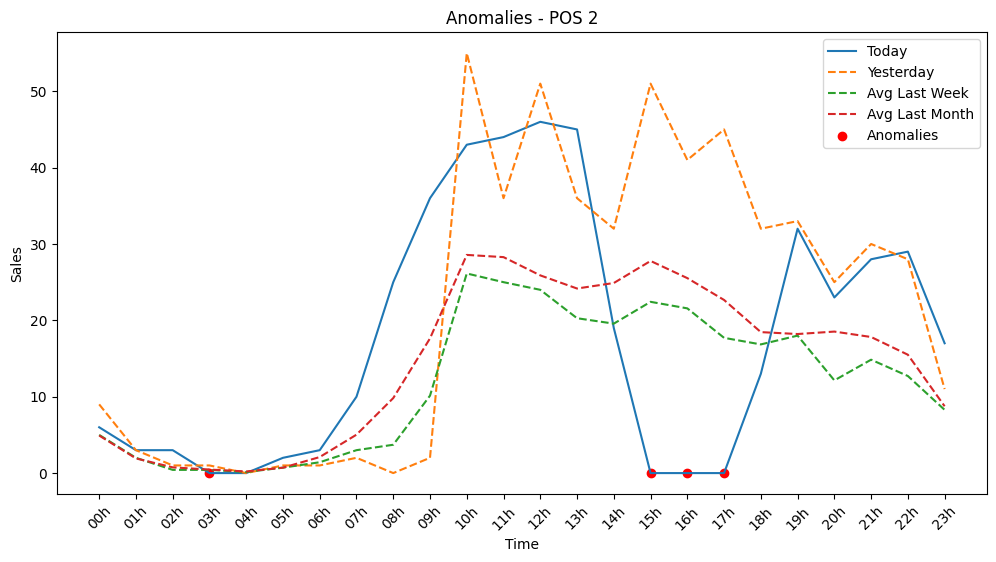


Anomalies - POS 2:
   time  today  yesterday  avg_last_week  avg_last_month
3   03h      0          1          0.420            0.46
15  15h      0         51         22.427           27.78
16  16h      0         41         21.570           25.53
17  17h      0         45         17.710           22.67


In [29]:
# Anomaly Analysis - POS 1
pos1_anomalies = pos1_data[
    (
        (pos1_data['today'] < 0.5 * pos1_data['yesterday'])
    ) &
    (
        (pos1_data['today'] > 1.5 * pos1_data['avg_last_week']) | (pos1_data['today'] < 0.5 * pos1_data['avg_last_week'])
    ) &
    (
        (pos1_data['today'] > 1.5 * pos1_data['avg_last_month']) | (pos1_data['today'] < 0.5 * pos1_data['avg_last_month'])
    ) |
    (
        (pos1_data['today'] == 0) & (pos1_data['yesterday'] != 0) &
        (pos1_data['avg_last_week'] != 0) & (pos1_data['avg_last_month'] != 0)
    )
]

# Anomaly Analysis - POS 2
pos2_anomalies = pos2_data[
    (
        (pos2_data['today'] < 0.5 * pos2_data['yesterday'])
    ) &
    (
        (pos2_data['today'] > 2 * pos2_data['avg_last_week']) | (pos2_data['today'] < 0.5 * pos2_data['avg_last_week'])
    ) &
    (
        (pos2_data['today'] > 2 * pos2_data['avg_last_month']) | (pos2_data['today'] < 0.5 * pos2_data['avg_last_month'])
    ) |
    (
        (pos2_data['today'] == 0) & (pos2_data['yesterday'] != 0) &
        (pos2_data['avg_last_week'] != 0) & (pos2_data['avg_last_month'] != 0)
    )
]

# Anomaly Graph - POS 1
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='today', data=pos1_data, label='Today')
sns.lineplot(x='time', y='yesterday', data=pos1_data, label='Yesterday', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_week', data=pos1_data, label='Avg Last Week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_month', data=pos1_data, label='Avg Last Month', linestyle='dashed')
plt.scatter(x=pos1_anomalies['time'], y=pos1_anomalies['today'], color='red', label='Anomalies')
plt.title('Anomalies - POS 1')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Anomaly Table - POS 1
if not pos1_anomalies.empty:
    print("Anomalies - POS 1:")
    print(pos1_anomalies[['time', 'today', 'yesterday', 'avg_last_week', 'avg_last_month']])
else:
    print("No anomalies found - POS 1")

# Anomaly Graph - POS 2
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='today', data=pos2_data, label='Today')
sns.lineplot(x='time', y='yesterday', data=pos2_data, label='Yesterday', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_week', data=pos2_data, label='Avg Last Week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_month', data=pos2_data, label='Avg Last Month', linestyle='dashed')
plt.scatter(x=pos2_anomalies['time'], y=pos2_anomalies['today'], color='red', label='Anomalies')
plt.title('Anomalies - POS 2')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Anomaly Table - POS 2
if not pos2_anomalies.empty:
    print("\nAnomalies - POS 2:")
    print(pos2_anomalies[['time', 'today', 'yesterday', 'avg_last_week', 'avg_last_month']])
else:
    print("\nNo anomalies found - POS 2")

## 4. SQL Queries

``` mysql
-- SQL Query - POS 1
SELECT *
FROM pos1_data
WHERE
    (
        (today < 0.5 * yesterday)
    ) AND
    (
        (today > 1.5 * avg_last_week) OR (today < 0.5 * avg_last_week)
    ) AND
    (
        (today > 1.5 * avg_last_month) OR (today < 0.5 * avg_last_month)
    ) OR
    (
        (today = 0) AND (yesterday != 0) AND
        (avg_last_week != 0) AND (avg_last_month != 0)
    );

-- SQL Query - POS 2
SELECT *
FROM pos2_data
WHERE
    (
        (today < 0.5 * yesterday)
    ) AND
    (
        (today > 2 * avg_last_week) OR (today < 0.5 * avg_last_week)
    ) AND
    (
        (today > 2 * avg_last_month) OR (today < 0.5 * avg_last_month)
    ) OR
    (
        (today = 0) AND (yesterday != 0) AND
        (avg_last_week != 0) AND (avg_last_month != 0)
    );

```